In [1]:
import numpy as np, pandas as pd, os, sys, seaborn as sns, warnings, matplotlib.pyplot as plt, statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)
warnings.filterwarnings(action='ignore')
os.chdir("/Users/home/Desktop/Research/Coronavirus/Public GitHub")
%run Coronavirus_Music_Functions.ipynb

In [2]:
with open("/Users/home/Desktop/Research/Coronavirus/Public GitHub/factors_all_data.csv", encoding="utf8", errors='ignore') as file:
    all_data = pd.read_csv(file)
        
all_data.rename(columns={'Demographics_General_Gender': 'Gender'}, inplace=True)
all_data.columns = all_data.columns.str.replace(r'^.*_', '', regex=True)
all_data.shape

(5113, 238)

In [3]:
living = [c for c in all_data.columns if c.startswith('Living Situation') and 'No Response' not in c]
work = [c for c in all_data.columns if c.startswith('Ways Work Affected') and 'No Response' not in c]
covid = [c for c in all_data.columns if c.startswith('Infected with COVID') and 'No Response' not in c]
col_list = living + work + covid

all_X = all_data.loc[:,col_list]
all_X.reset_index(inplace = True, drop = True)

### **Factor 1: Negative Emotions**

In [4]:
y = all_data.loc[:,'F1']

<AxesSubplot:>

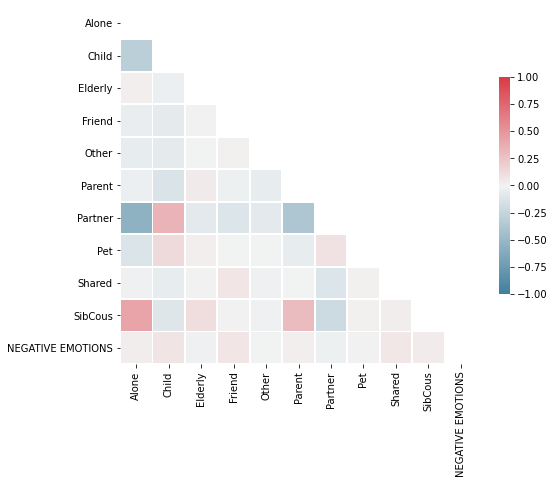

In [5]:
# living situation
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [6]:
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit(L1_wt=1, refit=True)
f1_living_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.913
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.21e-16
Time:                        14:37:23   Log-Likelihood:                -6880.7
No. Observations:                5113   AIC:                         1.378e+04
Df Residuals:                    5102   BIC:                         1.386e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1393      0.040     -3.503      0.000      -0.217      -0.061
Alone          0.1506      0.051      2.978      0.003       0.051       0.250
Child          0.2111      0.030      6.924      0.000       0.151       0.271
Elderly       -0.1129      0.102     -1.102      0.270      -0.314       0.088
Friend         0.5510      0.103      5.353      0.000       0.349       0.753
Other          0.0466      0.098      0.475      0.635      -0.146       0.239
Parent         0.0931      0.042      2.200      0.028       0.010       0.176
Partner        0.0163      0.039      0.416      0.678      -0.061       0.093
Pet           -0.0092      0.033     -0.280      0.779      -0.073       0.055
Shared         0.4049      0.094      4.307      0.000       0.221       0.589
SibCous        0.0278      0.080      0.348      0.728      -0.129       0.185
==============================================================================
Omnibus:                      127.251   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.243
Skew:                          -0.338   Prob(JB):                     3.91e-33
Kurtosis:                       3.493   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

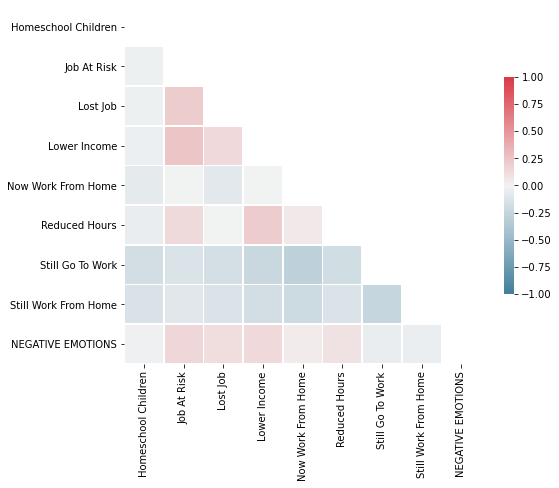

In [7]:
# work situation
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [8]:
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_work_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     26.25
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           9.63e-45
Time:                        14:37:24   Log-Likelihood:                -6814.2
No. Observations:                5113   AIC:                         1.365e+04
Df Residuals:                    5104   BIC:                         1.371e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2160      0.031     -6.898      0.000      -0.277      -0.155
Homeschool Children      0.0540      0.045      1.206      0.228      -0.034       0.142
Job At Risk              0.3616      0.054      6.670      0.000       0.255       0.468
Lost Job                 0.3398      0.049      6.905      0.000       0.243       0.436
Lower Income             0.2554      0.037      6.932      0.000       0.183       0.328
Now Work From Home       0.1476      0.035      4.232      0.000       0.079       0.216
Reduced Hours            0.1783      0.039      4.577      0.000       0.102       0.255
Still Go To Work         0.1092      0.038      2.902      0.004       0.035       0.183
Still Work From Home     0.1010      0.038      2.685      0.007       0.027       0.175
==============================================================================
Omnibus:                      184.763   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.511
Skew:                          -0.417   Prob(JB):                     1.07e-49
Kurtosis:                       3.603   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

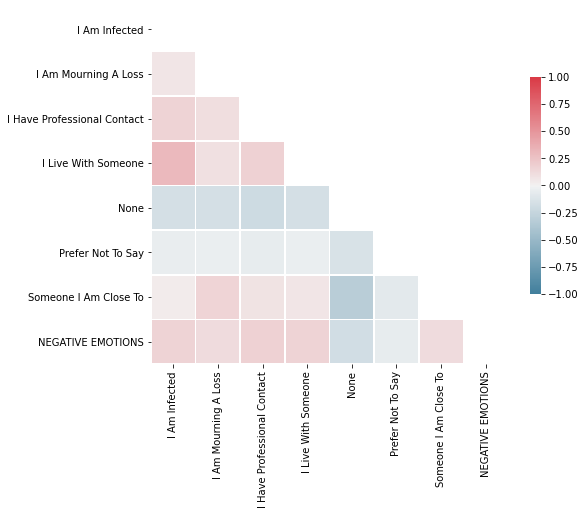

In [9]:
# contact with Covid-19
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [10]:
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_covid_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     59.74
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.12e-93
Time:                        14:37:24   Log-Likelihood:                -6701.1
No. Observations:                5113   AIC:                         1.342e+04
Df Residuals:                    5105   BIC:                         1.348e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0088      0.021     -0.430      0.667      -0.049       0.032
I Am Infected                   0.4982      0.070      7.167      0.000       0.362       0.635
I Am Mourning A Loss            0.3237      0.068      4.764      0.000       0.190       0.457
I Have Professional Contact     0.4307      0.057      7.578      0.000       0.319       0.542
I Live With Someone             0.4618      0.072      6.381      0.000       0.320       0.604
None                           -0.1884      0.028     -6.623      0.000      -0.244      -0.133
Prefer Not To Say              -0.2345      0.068     -3.433      0.001      -0.368      -0.101
Someone I Am Close To           0.1619      0.040      4.086      0.000       0.084       0.240
==============================================================================
Omnibus:                      233.355   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.640
Skew:                          -0.474   Prob(JB):                     6.35e-65
Kurtosis:                       3.700   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Factor 3: Positive Emotions**

In [11]:
y = all_data.loc[:,'F3']

<AxesSubplot:>

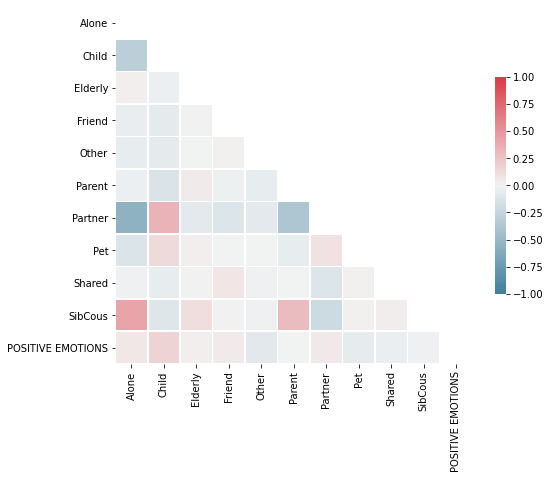

In [12]:
# living situation
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [13]:
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     34.19
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.90e-71
Time:                        14:37:25   Log-Likelihood:                -6302.6
No. Observations:                5113   AIC:                         1.263e+04
Df Residuals:                    5102   BIC:                         1.271e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3714      0.036    -10.458      0.000      -0.441      -0.302
Alone          0.5129      0.045     11.350      0.000       0.424       0.601
Child          0.3927      0.027     14.419      0.000       0.339       0.446
Elderly        0.2380      0.092      2.600      0.009       0.059       0.417
Friend         0.5514      0.092      5.998      0.000       0.371       0.732
Other         -0.2620      0.088     -2.987      0.003      -0.434      -0.090
Parent         0.2333      0.038      6.176      0.000       0.159       0.307
Partner        0.2438      0.035      6.945      0.000       0.175       0.313
Pet           -0.1378      0.029     -4.719      0.000      -0.195      -0.081
Shared        -0.0452      0.084     -0.538      0.591      -0.210       0.119
SibCous       -0.4145      0.071     -5.805      0.000      -0.554      -0.275
==============================================================================
Omnibus:                      582.431   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.430
Skew:                           0.710   Prob(JB):                    9.70e-266
Kurtosis:                       4.926   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

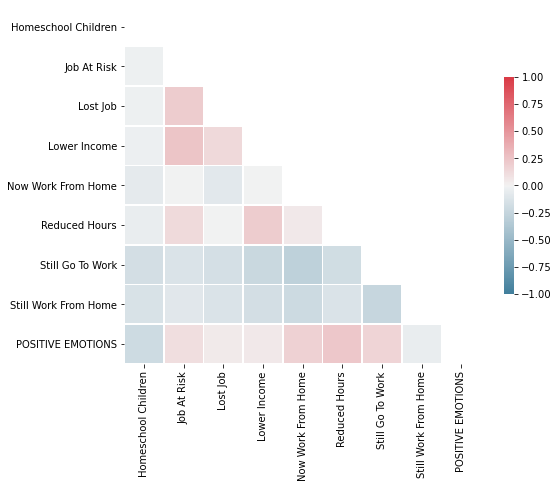

In [14]:
# work situation
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [15]:
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          3.92e-241
Time:                        14:37:26   Log-Likelihood:                -5910.5
No. Observations:                5113   AIC:                         1.184e+04
Df Residuals:                    5104   BIC:                         1.191e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5590      0.026    -21.303      0.000      -0.610      -0.508
Homeschool Children     -0.2144      0.037     -5.716      0.000      -0.288      -0.141
Job At Risk              0.3204      0.045      7.052      0.000       0.231       0.409
Lost Job                 0.3704      0.041      8.982      0.000       0.290       0.451
Lower Income             0.1438      0.031      4.658      0.000       0.083       0.204
Now Work From Home       0.6208      0.029     21.242      0.000       0.564       0.678
Reduced Hours            0.6645      0.033     20.352      0.000       0.601       0.729
Still Go To Work         0.7207      0.032     22.862      0.000       0.659       0.783
Still Work From Home     0.3436      0.032     10.897      0.000       0.282       0.405
==============================================================================
Omnibus:                      456.282   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              919.693
Skew:                           0.589   Prob(JB):                    1.96e-200
Kurtosis:                       4.712   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

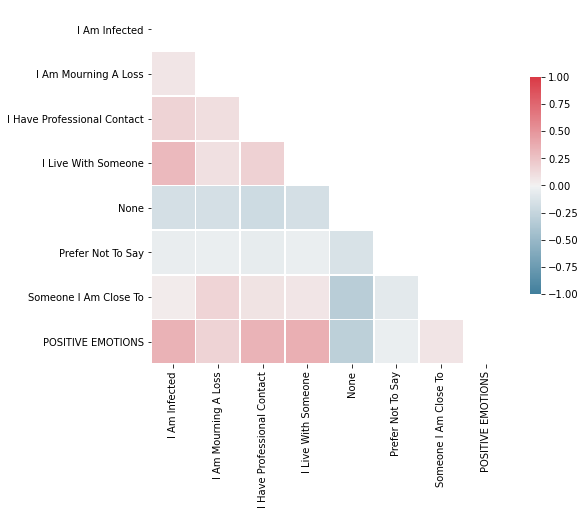

In [16]:
# contact with Covid-19
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [17]:
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     264.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:37:26   Log-Likelihood:                -5599.1
No. Observations:                5113   AIC:                         1.122e+04
Df Residuals:                    5105   BIC:                         1.128e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0135      0.017      0.811      0.418      -0.019       0.046
I Am Infected                   0.9384      0.056     16.744      0.000       0.828       1.048
I Am Mourning A Loss            0.3938      0.055      7.190      0.000       0.286       0.501
I Have Professional Contact     0.8198      0.046     17.893      0.000       0.730       0.910
I Live With Someone             1.0291      0.058     17.637      0.000       0.915       1.143
None                           -0.3169      0.023    -13.823      0.000      -0.362      -0.272
Prefer Not To Say              -0.1496      0.055     -2.717      0.007      -0.258      -0.042
Someone I Am Close To          -0.1039      0.032     -3.252      0.001      -0.166      -0.041
==============================================================================
Omnibus:                       23.455   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.119
Skew:                          -0.017   Prob(JB):                     1.06e-07
Kurtosis:                       3.387   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""